# EDA & Model implementation 

In [1]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,max_error
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pickle


In [4]:

#import data from csv

results=pd.read_csv('./final.csv',sep=',', error_bad_lines=False, index_col=False)
#removing unique and unwanted columns for eda/ml purposes

results.drop(['university', 'page_no',  'exam_held_on',
        'result_date','c2_or','c4_or','c5_tw','c5_or','c5','c6','c6_tw', 'c6_or'],1,inplace =True)

# view columns of data set 
print(results.columns)
# creating integer based columns list and converting string based integer to integer
int_col = ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
                 'c4_in','sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6','sem_7', 'sem_8', 'cgpi']
                                                                                                                                                                                                          
#to view all  columns

pd.set_option('display.max_columns', None)


for x in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
           'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
           'c4_in','sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi','college_code']:
    
    #print(x)                                              

    results[x] = results[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 


    if x == 'college_code':
        results[x].replace('(?<![\w\d])NAME(?![\w\d])(:)','',regex=True, inplace = True)
        
    
    if x != 'college_code':
        results[x].replace('[^0-9.]','',regex=True, inplace = True)
        results[x]=pd.to_numeric(results[x])
 

 #to remove characters from string of numbers

for x in ['department', 'college_code', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4']:
    
    
    
    #print(x)                                              
    results[x].replace('[^0-9: A-z]','',regex=True, inplace = True)
     
    results[x] = results[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 



departments= results.department.unique()

# to find the null replace them with the zeros and drop sem marks with zeros
for x in [ 'sem_3',
       'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi']:
        results = results[(results[x]>3) & (results['c1_or']<50)]
results.fillna(0,inplace=True) 

        
# creating new data frame of passed students 

passed = results[results['result']=='P']

colleges = results['college_code'].unique()

# filling the null values with respective colleges mean 

# for i in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
#        'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
#        'c4_or', 'c4_in', 'c5_tw','c5_or',]:
#     for x in colleges:
#         #print(passed[i].loc[passed['college_code']==x].mean(),str(x),i)
#         passed.fillna((0),inplace=True)


# creating new dataset for diploma students 

diploma = passed[passed['sem_1']=="['Diploma']"]

regular = passed[passed['sem_1']!="['Diploma']"]
#to remove characters from string of numbers

for x in ['sem_1','sem_2']:
    regular[x].replace('[^0-9.]','',regex=True, inplace = True)
    regular[x] = regular[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 
    regular[x]=pd.to_numeric(regular[x])
     

regular.to_csv("regular.csv")
diploma.to_csv("diploma.csv")

C:\Users\rushi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['department', 'college_code', 'seat_no', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4', 'c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw', 'c4_in',
       'sem_1', 'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8',
       'cgpi'],
      dtype='object')


C:\Users\rushi\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guid

In [25]:
print('sum of null values in college_code column: ' + str(results['college_code'].isnull().sum()))
print('\n')
print(results['college_code'].unique())
print("total unique in college_codes "+str(len(results['college_code'].unique())))
print('\n')
new = pd.get_dummies(results,columns=['college_code'], drop_first=False)
print(new.columns)
print("Total columns after get dummies "+str(len(new.columns)))
print("Total columns before get dummies"+str(len(results.columns)))

sum of null values in college_code column: 0


['10:MHSSCE' '523:RMCET' '561:PIITE' '692:SCE' '802:THEEM' '822:PILLAIS'
 '948:BRHCET' '995:NEW HORIZO' '17:BVCE' '116:CSM INST' '124:MGMCET'
 '237:TEC' '385:ACPCE' '390:RSCE' '421:DJSCE' '426:FCRIT' '428:DMCE'
 '438:KGSCE' '442:LTCE' '443:FAMT' '461:SSJCE' '466:VCET' '522:RIZVI'
 '524:MCTCE' '533:SSPM' '537:TCET' '688:DBIT' '690:SIES' '734:YTIET'
 '742:GHARADA' '751:SSJCET' '776:ARIET' '779:STJCET' '780:YTEM'
 '807:GVAIET' '823:VIVATECH' '824:SESKARJAT' '857:DILKAP' '889:LAINSTT'
 '890:LRTIWARI' '944:AIISET' '945:VOGCOE' '946:GMVIT' '949:MITM'
 '978:PARSHURAM' '990:VISHWANIKE' '991:IDAL INST' '996:A P SHAH' '534:VIT'
 '689:KCCE' '691:KJSIET' '736:XIE' '982:VIDYAVIKAS' '55:CRCE' '126:SAKEC'
 '174:RAIT' '356:PVPPCE' '366:VESIT' '532:ACE' '531:SFIT' '238:TSEC'
 '368:WIECT' '403:SIGCE' '735:SPIT']
total unique in college_codes 64


Index(['department', 'seat_no', 'elective', 'result', 'c1', 'c2', 'c3', 'c4',
       'c1_th', 'c1_tw', 'c1_or', 

In [31]:
results['department'].value_counts()

COMPUTER ENGINEERING                             14975
MECHANICAL                                        8609
INFORMATION TECHNOLOGY ENGINEERING                6306
CIVIL                                             4510
ELECTRONICS AND TELECOMMUNICATION ENGINEERING     4016
ELECTRONICS ENGINEERING                           3259
AUTOMOBILE ENGINEERING                             236
ELECTRONICS AND ELECTRICAL ENGINEERING              19
Name: department, dtype: int64

In [41]:
import plotly.express as px
import plotly.graph_objects as go


In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['Sem 1'],
    y=[regular['sem_5']],
    name='Gaps',
))
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 3, 5, 7, 9, 10],
        ticktext = ['One', 'Three', 'Five', 'Seven', 'Nine']
    )
)

fig.show()

# Model building

In [18]:
regular.columns

Index(['department', 'college_code', 'seat_no', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4', 'c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw', 'c4_in',
       'sem_1', 'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8',
       'cgpi'],
      dtype='object')

In [8]:
data =  regular.filter(['department', 'college_code',
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)
final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=True)
X = final.drop('sem_8',1)
y = final['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))
print(df1.head(3))
df1.plot(kind='bar',figsize=(10,8))

X_test.to_csv('template.csv',index = False)
outfile = open('regression_model_regular','wb')
pickle.dump(regressor,outfile)
outfile.close()
plt.show()

In [ ]:
infile = open('model','rb')
model = pickle.load(infile)
infile.close()

In [16]:
def run_model(new):
    
    X = final.drop('sem_8',1)
    y = final['sem_8']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)
    print('maximum Error : ' +str( max_error(y_test,y_pred)))
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1 = df.head(90)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R Squared :', r2_score(y_test, y_pred))
    print(df1.head(3))
    df1.plot(kind='bar',figsize=(10,8))

    plt.show()

maximum Error : 1.887583141658438
Mean Absolute Error: 0.35438214331653844
Mean Squared Error: 0.20109534383724156
Root Mean Squared Error: 0.44843655497432583
R Squared : 0.6354124107787356
       Actual  Predicted
1637     9.84   8.969387
49021    5.89   6.998626
18419    8.04   8.418860


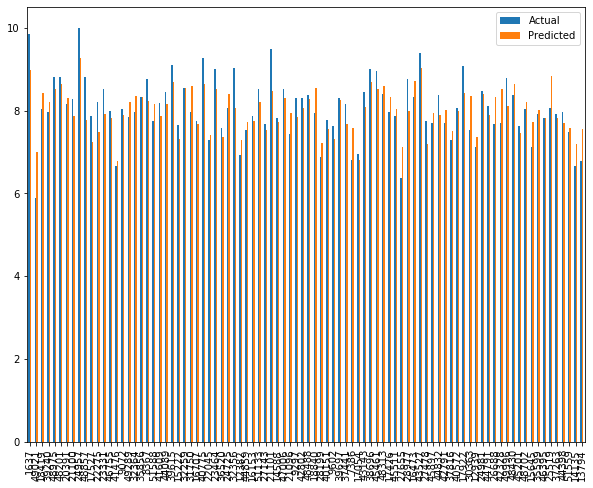

In [20]:
new_data = regular.filter(['department', 'college_code','elective','c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw', 'c4_in',
       'sem_1', 'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8',
       'cgpi'])
new_data = pd.get_dummies(new_data,columns=['department', 'college_code','elective'],drop_first=True)

run_model(new_data)

## Diploma predictions


maximum Error : 2.0058349609375004
Mean Absolute Error: 0.35599749195135133
Mean Squared Error: 0.2023162979772938
Root Mean Squared Error: 0.4497958403290251
R Squared : 0.6116319107235998
       Actual  Predicted
32599    7.69   7.529953
42144    8.67   7.869843
7161     7.04   7.727615


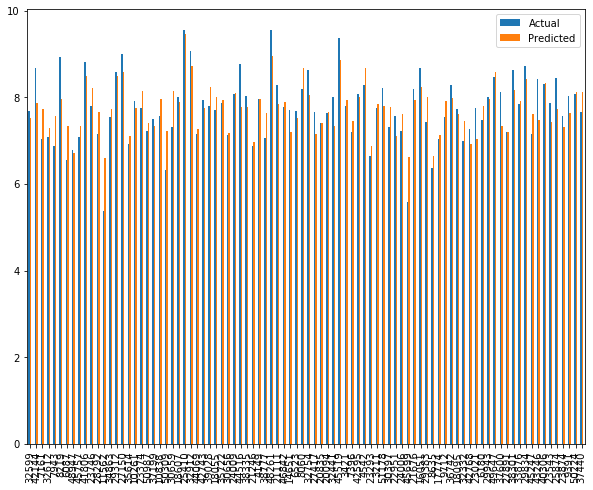

In [64]:

data =  diploma.filter(['department', 'college_code',
                        'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)
final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=False)
X = final.drop('sem_8',1)
y = final['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))
print(df1.head(3))
df1.plot(kind='bar',figsize=(10,8))

X_test.to_csv('Diploma_template.csv',index = False)
outfile = open('regression_model_diploma','wb')
pickle.dump(regressor,outfile)
outfile.close()
plt.show()




In [53]:
len(X_test.columns)

74

In [40]:
ab = ['we','er','ewre']
i=0
for x in ab:
    
    print(ab.index(x))
    ab[i]=1
    print(ab)
    i=i+1

0
[1, 'er', 'ewre']
1
[1, 1, 'ewre']
2
[1, 1, 1]


In [34]:
ab[2] =23

In [41]:
import streamlit as st

In [ ]:
st.sidebar.selectbox

In [47]:
import statistics 


In [49]:
statistics.mean([1,2,34,5,6])

9.6

In [57]:
max_df = regular.groupby(['college_code','department']).max()
max_df.reset_index(inplace=True)
max_df.to_csv('max_df.csv',index =False)
print(max_df.columns)

min_df = regular.groupby(['college_code','department']).min()
min_df.reset_index(inplace=True)
min_df.to_csv('min_df.csv',index =False)
print(min_df.columns)

min_df_dip = diploma.groupby(['college_code','department']).min()
min_df_dip.reset_index(inplace=True)
min_df_dip.to_csv('min_df_dip.csv',index =False)
print(min_df_dip.columns)

mean_df_dip = diploma.groupby(['college_code','department']).mean()
mean_df_dip.reset_index(inplace=True)
mean_df_dip.to_csv('mean_df_dip.csv',index =False)
print(mean_df_dip.columns)

max_df_dip = diploma.groupby(['college_code','department']).max()
max_df_dip.reset_index(inplace=True)
max_df_dip.to_csv('max_df_dip.csv',index =False)
print(max_df_dip.columns)

Index(['college_code', 'department', 'seat_no', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4', 'c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw', 'c4_in',
       'sem_1', 'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8',
       'cgpi'],
      dtype='object')


In [41]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,max_error
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pickle
import xgboost as xgb


#import data from csv

results=pd.read_csv('./final.csv',sep=',', error_bad_lines=False, index_col=False)
#removing unique and unwanted columns for eda/ml purposes

results.drop(['university', 'page_no',  'exam_held_on',
        'result_date','c2_or','c4_or','c5_tw','c5_or','c5','c6','c6_tw', 'c6_or'],1,inplace =True)

# view columns of data set 
print(results.columns)
# creating integer based columns list and converting string based integer to integer
int_col = ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
                 'c4_in','sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6','sem_7', 'sem_8', 'cgpi']
                                                                                                                                                                                                          
#to view all  columns

pd.set_option('display.max_columns', None)


for x in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
           'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
           'c4_in','sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi','college_code']:
    
    #print(x)                                              

    results[x] = results[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 


    if x == 'college_code':
        results[x].replace('(?<![\w\d])NAME(?![\w\d])(:)','',regex=True, inplace = True)
        
    
    if x != 'college_code':
        results[x].replace('[^0-9.]','',regex=True, inplace = True)
        results[x]=pd.to_numeric(results[x])
 

 #to remove characters from string of numbers

for x in ['department', 'college_code', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4']:
    
    
    
    #print(x)                                              
    results[x].replace('[^0-9: A-z]','',regex=True, inplace = True)
     
    results[x] = results[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 



departments= results.department.unique()

# to find the null replace them with the zeros and drop sem marks with zeros
for x in [ 'sem_3',
       'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi']:
        results = results[(results[x]>3) & (results['c1_or']<50)]
results.fillna(0,inplace=True) 

        
# creating new data frame of passed students 

passed = results[results['result']=='P']

colleges = results['college_code'].unique()

# filling the null values with respective colleges mean 

# for i in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
#        'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
#        'c4_or', 'c4_in', 'c5_tw','c5_or',]:
#     for x in colleges:
#         #print(passed[i].loc[passed['college_code']==x].mean(),str(x),i)
#         passed.fillna((0),inplace=True)


# creating new dataset for diploma students 

diploma = passed[passed['sem_1']=="['Diploma']"]

regular = passed[passed['sem_1']!="['Diploma']"]
#to remove characters from string of numbers

for x in ['sem_1','sem_2']:
    regular[x].replace('[^0-9.]','',regex=True, inplace = True)
    regular[x] = regular[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 
    regular[x]=pd.to_numeric(regular[x])
     

regular.to_csv("regular.csv")
diploma.to_csv("diploma.csv")




data =  regular.filter(['department', 'college_code',
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)

final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=False)

X = final.drop('sem_8',1)
y = final['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
#regressor = LinearRegression()  
regressor = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))
print(df1.head(3))
df1.plot(kind='bar',figsize=(10,8))
print(X_test.columns)

X_test.to_csv('template.csv',index = False)
outfile = open('regression_model_regular','wb')
pickle.dump(regressor,outfile)
outfile.close()
plt.show()


mean_df = regular.groupby(['college_code','department']).mean()
mean_df.reset_index(inplace=True)
mean_df.to_csv('mean_df.csv',index =False)

max_df = regular.groupby(['college_code','department']).max()
max_df.reset_index(inplace=True)
max_df.to_csv('max_df.csv',index =False)


min_df = regular.groupby(['college_code','department']).min()
min_df.reset_index(inplace=True)
min_df.to_csv('min_df.csv',index =False)






FileNotFoundError: [Errno 2] File ./final.csv does not exist: './final.csv'

maximum Error : 2.0057484238623466
Mean Absolute Error: 0.35599607182610443
Mean Squared Error: 0.20231536953761392
Root Mean Squared Error: 0.4497948082599597
R Squared : 0.6116336929643194
       Actual  Predicted
32599    7.69   7.529949
42144    8.67   7.869909
7161     7.04   7.727711


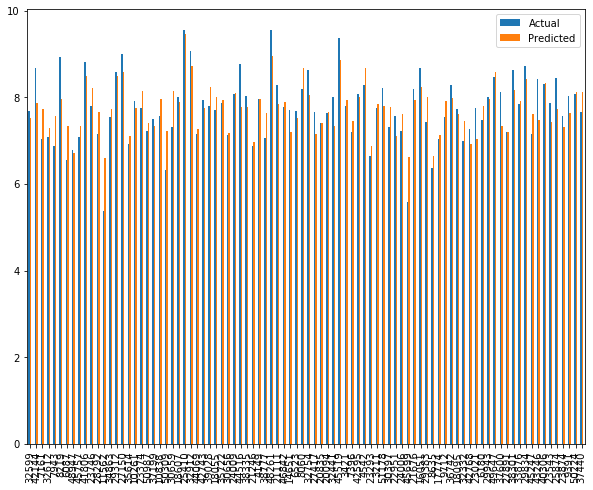

In [2]:



data =  diploma.filter(['department', 'college_code',
                        'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)
final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=True)
X = final.drop('sem_8',1)
y = final['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))
print(df1.head(3))
df1.plot(kind='bar',figsize=(10,8))

X_test.to_csv('Diploma_template.csv',index = False)
outfile = open('regression_model_diploma','wb')
pickle.dump(regressor,outfile)
outfile.close()
plt.show()

min_df_dip = diploma.groupby(['college_code','department']).min()
min_df_dip.reset_index(inplace=True)
min_df_dip.to_csv('min_df_dip.csv',index =False)

mean_df_dip = diploma.groupby(['college_code','department']).mean()
mean_df_dip.reset_index(inplace=True)
mean_df_dip.to_csv('mean_df_dip.csv',index =False)

max_df_dip = diploma.groupby(['college_code','department']).max()
max_df_dip.reset_index(inplace=True)
max_df_dip.to_csv('max_df_dip.csv',index =False)









In [8]:
import sklearn; 
sklearn.show_versions()

C:\Users\rushi\anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(



System:
    python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\rushi\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.1.1
   setuptools: 49.2.0.post20200714
      sklearn: 0.23.1
        numpy: 1.18.5
        scipy: 1.5.0
       Cython: 0.29.21
       pandas: 1.0.5
   matplotlib: 3.2.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


<module 'numpy' from 'C:\\Users\\rushi\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

In [14]:
pip install [sklearn
numpy
pandas
re
matplotlib
seaborn
pickle]

SyntaxError: invalid syntax (<ipython-input-14-8707038a079c>, line 1)

[18:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
maximum Error : 2.226497173309326
Mean Absolute Error: 0.5067156735848509
Mean Squared Error: 0.38226325397351113
Root Mean Squared Error: 0.6182744163989896
R Squared : 0.2562572716257465
       Actual  Predicted
11800    7.30   7.304217
9978     8.67   8.610051
13429    7.62   7.554036


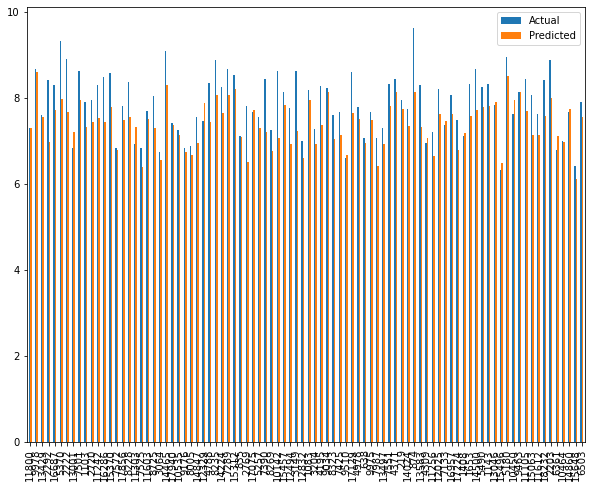

In [49]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,max_error
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pickle
import xgboost as xgb



diploma = pd.read_csv('./csv_db/diploma.csv')


data_dip =  diploma.filter(['department', 'college_code',
                        'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)
final_dip = pd.get_dummies(data_dip,columns=['department', 'college_code'],drop_first=False)
X_dip = final_dip.drop('sem_8',1)
y_dip = final_dip['sem_8']
X_train_dip,X_test_dip,y_train_dip,y_test_dip = train_test_split(X_dip,y_dip,test_size=0.33,random_state=13)
regressor_dip = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 8, seed = 100) 
  
#regressor_dip = LinearRegression()  
regressor_dip.fit(X_train_dip, y_train_dip) #training the algorithm
y_pred_dip = regressor_dip.predict(X_test_dip)
print('maximum Error : ' +str( max_error(y_test_dip,y_pred_dip)))
df_dip = pd.DataFrame({'Actual': y_test_dip, 'Predicted': y_pred_dip})
df1_dip = df_dip.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dip, y_pred_dip))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dip, y_pred_dip))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dip, y_pred_dip)))
print('R Squared :', r2_score(y_test_dip, y_pred_dip))
print(df1_dip.head(3))
df1_dip.plot(kind='bar',figsize=(10,8))

X_test_dip.to_csv('./csv_db/Diploma_template.csv',index = False)
outfile = open('regression_model_diploma','wb')
pickle.dump(regressor_dip,outfile)
outfile.close()
plt.show()

min_df_dip = diploma.groupby(['college_code','department']).min()
min_df_dip.reset_index(inplace=True)
min_df_dip.to_csv('./csv_db/min_df_dip.csv',index =False)

mean_df_dip = diploma.groupby(['college_code','department']).mean()
mean_df_dip.reset_index(inplace=True)
mean_df_dip.to_csv('./csv_db/mean_df_dip.csv',index =False)

max_df_dip = diploma.groupby(['college_code','department']).max()
max_df_dip.reset_index(inplace=True)
max_df_dip.to_csv('./csv_db/max_df_dip.csv',index =False)





[18:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
maximum Error : 2.226497173309326
Mean Absolute Error: 0.5067156735848509
Mean Squared Error: 0.38226325397351113
Root Mean Squared Error: 0.6182744163989896
R Squared : 0.2562572716257465
       Actual  Predicted
11800    7.30   7.304217
9978     8.67   8.610051
13429    7.62   7.554036


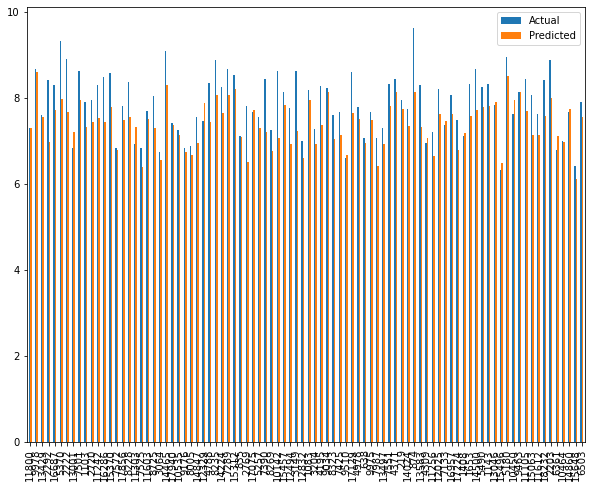

In [57]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,max_error
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pickle
import xgboost as xgb



diploma = pd.read_csv('./csv_db/diploma.csv')


data_dip =  diploma.filter(['department', 'college_code',
                        'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)
final_dip = pd.get_dummies(data_dip,columns=['department', 'college_code'],drop_first=False)
X_dip = final_dip.drop('sem_8',1)
y_dip = final_dip['sem_8']
X_train_dip,X_test_dip,y_train_dip,y_test_dip = train_test_split(X_dip,y_dip,test_size=0.33,random_state=13)
regressor_dip = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 8) 
  
#regressor_dip = LinearRegression()  
regressor_dip.fit(X_train_dip, y_train_dip) #training the algorithm
y_pred_dip = regressor_dip.predict(X_test_dip)
print('maximum Error : ' +str( max_error(y_test_dip,y_pred_dip)))
df_dip = pd.DataFrame({'Actual': y_test_dip, 'Predicted': y_pred_dip})
df1_dip = df_dip.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dip, y_pred_dip))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dip, y_pred_dip))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dip, y_pred_dip)))
print('R Squared :', r2_score(y_test_dip, y_pred_dip))
print(df1_dip.head(3))
df1_dip.plot(kind='bar',figsize=(10,8))

X_test_dip.to_csv('./csv_db/Diploma_template.csv',index = False)
outfile = open('regression_model_diploma','wb')
pickle.dump(regressor_dip,outfile)
outfile.close()
plt.show()

min_df_dip = diploma.groupby(['college_code','department']).min()
min_df_dip.reset_index(inplace=True)
min_df_dip.to_csv('./csv_db/min_df_dip.csv',index =False)

mean_df_dip = diploma.groupby(['college_code','department']).mean()
mean_df_dip.reset_index(inplace=True)
mean_df_dip.to_csv('./csv_db/mean_df_dip.csv',index =False)

max_df_dip = diploma.groupby(['college_code','department']).max()
max_df_dip.reset_index(inplace=True)
max_df_dip.to_csv('./csv_db/max_df_dip.csv',index =False)





C:\Users\rushi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[18:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
maximum Error : 2.3422750282287605
Mean Absolute Error: 0.5185046946804538
Mean Squared Error: 0.3961098096740514
Root Mean Squared Error: 0.6293725523678733
R Squared : 0.2818495057108765
       Actual  Predicted
1637     9.84   8.370987
49021    5.89   6.530399
18419    8.04   7.907810


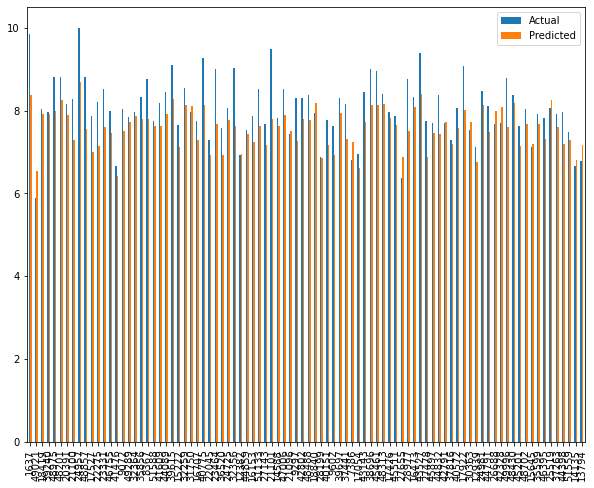

In [61]:
data= pd.read_csv('./csv_db/final.csv')

data =  regular.filter(['department', 'college_code',
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)

final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=False)

X = final.drop('sem_8',1)
y = final['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
regressor = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 8, seed = 13) 
  
#regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))
print(df1.head(3))
df1.plot(kind='bar',figsize=(10,8))
#print(X_test.columns)

X_test.to_csv('./csv_db/template.csv',index = False)
outfile = open('regression_model_regular','wb')
pickle.dump(regressor,outfile)
outfile.close()
plt.show()


mean_df = regular.groupby(['college_code','department']).mean()
mean_df.reset_index(inplace=True)
mean_df.to_csv('./csv_db/mean_df.csv',index =False)

max_df = regular.groupby(['college_code','department']).max()
max_df.reset_index(inplace=True)
max_df.to_csv('./csv_db/max_df.csv',index =False)


min_df = regular.groupby(['college_code','department']).min()
min_df.reset_index(inplace=True)
min_df.to_csv('./csv_db/min_df.csv',index =False)






In [ ]:
mean_df.to_csv('tem.csv', index=False,columns = ['department', 'college_code', 'sem_1', 'sem_2', 'sem_3', 'sem_4',
       'sem_5', 'sem_6', 'sem_7'])

In [ ]:
import plotly.express as px


In [ ]:
plt.plot(mean_df['sem_5'])

In [ ]:

fig = px.line(mean_df, x=["sem_1",'sem_2'], title='Life expectancy in Canada')
fig.show()

In [ ]:
mean_ = pd.get_dummies(regular,columns=['college_code','department'],drop_first=True)

In [ ]:
regular['department'].value_counts()

In [ ]:
regular.isnull().sum()

In [ ]:
import pickle



In [ ]:
outfile = open('regression_model','wb')
pickle.dump(regressor,outfile)
outfile.close()

In [ ]:
run_model(final)

## Test with only sem 1 marks

In [ ]:
regular.fillna(0,inplace=True)

In [ ]:
regular.isnull().sum()

In [ ]:
mean_df = regular.groupby(['college_code','department']).mean()
mean_df.reset_index(inplace=True)
mean_df.to_csv('mean_df.csv')
print(mean_df.columns)

In [ ]:
sub_dep = 'COMPUTER, ENGINEERING'
sub_college = '124:MGMCET'

In [ ]:
float(mean_df[(mean_df['college_code']==sub_college) & (mean_df['department']==sub_dep)]['sem_4'])

In [ ]:
float(a.round(2))

In [ ]:
mean_df.columns

In [ ]:
mean_df[mean_df['college_code']=='124:MGMCET']['department'].unique()

In [ ]:
sub_dep
sub_college
for x in int_col:
    if x != submitted :
        

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in ['sem_2',
 'sem_3', 'sem_4', 'sem_5', 'sem_6',
 'sem_7','c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
       'c4_or', 'c4_in']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


xtrain_end = X_train.shape[0]
X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[xtrain_end:]

X_train[xtrain_end:].index

X_train = X_train[:xtrain_end]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [ ]:
import streamlit as st 


In [ ]:
st.selectbox

In [ ]:
mean_df['college_code'].unique()

## test with sem 1,2

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    

regular.columns

# finding and replacing values with 3 conditions on columns 

for x in ['sem_3', 'sem_4', 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

 ## test with sem 1,2,3  

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_4', 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4,5

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4,5,6

In [ ]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [  'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [ ]:

X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

# for x in [ 'sem_4', 'sem_5', 'sem_6',
#  'sem_7']:
#     for y in colleges:
        
#         for z in departments:
#             difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
#             X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [ ]:
regular.describe()

In [ ]:
results.groupby(['department'])['c1_tw','c2_tw','c3_tw','c4_tw'].max()

In [ ]:
results.groupby(['department'])['c1_or','c2_or','c3_or','c4_or'].max()

In [ ]:
results.groupby(['department'])['c1_in','c2_in','c3_in','c4_in'].max()

In [ ]:
results.groupby(['department'])['c1_th','c1_tw',
                         'c1_or', 'c1_in', 'c2_th', 'c2_tw', 
                         'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
                        'c4_th', 'c4_tw', 'c4_in', 
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'].max()

In [ ]:
for x in ['sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5','sem_6', 'sem_7', 'sem_8']:
    re

In [117]:
float(regular['sem_2'][-1:])

6.72

In [108]:
import plotly.graph_objects as go

# Add data
sem = ["SEM I","SEM II","SEM III","SEM IV","SEM V","SEM VI","SEM VII","SEM VIII","CGPI"]
max_college = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
low_college = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
mean_college = [13.8, 23,34,56,56,34,65,53,45,65,34,65,76,56,45,87,45,34]
pred = [None,None,None,54,36,77,56,45,34,23,54,65]
sub = [10,23,34,54,None,None,None,None,None,None,None,None]
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=sem, y=max_college, name='Max of College',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=sem, y=mean_college, name='Mean of College',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=sem, y=low_college, name = 'Low of College',
                         line=dict(color='red', width=4)))
fig.add_trace(go.Scatter(x=sem, y=pred, name='Predicted',
                         line=dict(color='green', width=4,
                              dash='dash'),connectgaps=False ))
fig.add_trace(go.Scatter(x=sem, y=sub, name='Current',
                         line=dict(color='green', width=4),
                         connectgaps=False))
# Edit the layout
fig.update_layout(title='Performance per Semisters ',
                   xaxis_title='Semisters ',
                   yaxis_title='Pointers')
fig.update_yaxes(tickvals=[0,1,2,3,4,5,6,7,8,9,10])
fig.show()

In [62]:
import plotly.graph_objects as go

# Add data
sem = ["SEM I","SEM II","SEM III","SEM IV","SEM V","SEM VI","SEM VII","SEM VIII","CGPI"]
high_2000 = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
low_2000 = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
high_2007 = [36.5, 26.6, 43.6, 52.3, 71.5, 81.4, 80.5, 82.2, 76.0, 67.3, 46.1, 35.0]
low_2007 = [23.6, 14.0, 27.0, 36.8, 47.6, 57.7, 58.9, 61.2, 53.3, 48.5, 31.0, 23.6]
high_2014 = [28.8, 28.5, 37.0, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
low_2014 = [12.7, 14.3, 18.6, 35.5, 49.9, 58.0, 60.0, 58.6, 51.7, 45.2, 32.2, 29.1]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=sem, y=high_2014, name='High 2014',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=sem, y=low_2014, name = 'Low 2014',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=sem, y=high_2007, name='High 2007',
                         line=dict(color='firebrick', width=4,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=sem, y=low_2007, name='Low 2007',
                         line = dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=sem, y=high_2000, name='High 2000',
                         line = dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=sem, y=low_2000, name='Low 2000',
                         line=dict(color='royalblue', width=4, dash='dot')))

# Edit the layout
fig.update_layout(title='Average High and Low Temperatures in New York',
                   xaxis_title='Month',
                   yaxis_title='Temperature (degrees F)')
    

fig.show()

In [ ]:
#plotting scatter plot of students in colleges
# y-axis values 


# plotting points as a scatter plot 
for col in colleges:
    for stud in range(len(regular[regular['college_code']==col])):
        #print(stud)
        x = ['sem 1', 'sem 2','sem 3', 'sem 4', 'sem 5', 'sem 6', 'sem 7', 'sem 8','cgpi']
        y = [regular['sem_1'][stud],regular['sem_2'][stud],regular['sem_3'][stud]
             ,regular['sem_4'][stud],regular['sem_5'][stud],regular['sem_6'][stud]
             ,regular['sem_7'][stud],regular['sem_8'][stud],regular['cgpi'][stud] ]
        plt.scatter(x, y) 
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
        # x-axis label 
        plt.xlabel('Sem') 
        # frequency label 
        plt.ylabel('Pointers') 
        # plot title 
        plt.title('Semwise result of college code {0}'.format(col)) 
        # showing legend 


        # function to show the plot 
        plt.show()

In [ ]:
#Creating a function to plot semwise of entire result wrt indiviual colleges

def plot_sem(y,i):
    x = ['1', '2', '3',
       '4', '5', '6', '7', '8', 'CGPI']
    y = [y[ 'sem_1'],y[ 'sem_2'],y[ 'sem_3'],y[
       'sem_4'],y[ 'sem_5'],y[ 'sem_6'],y[ 'sem_7'],y[ 'sem_8'],y[ 'cgpi' ]]
    
    plt.plot(x,y,label=i,marker='.') 
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
   

In [ ]:
#Creating a function to plot termworkwise of entire result wrt indiviual colleges
def plot_tw(y,i):
    x = ['sem 1', 'sem 2', 'sem 3',
       'sem 4', 'sem 5', 'sem 6', 'sem 7', 'sem 8', 'cgpi']
    y = [y[ 'sem_1'],y[ 'sem_2'],y[ 'sem_3'],y[
       'sem_4'],y[ 'sem_5'],y[ 'sem_6'],y[ 'sem_7'],y[ 'sem_8'],y[ 'cgpi' ]]
    
    plt.scatter(x,y,label=i) 
    plt.yticks([0,50])
   

In [ ]:
#Creating a function to plot internal of entire result wrt indiviual colleges

def plot_internals(y,j):
    x = ['c1 tw', 'c1 or', 'c1 in','c2 tw',
       'c2 or', 'c2 in', 'c3 tw', 'c3 or', 'c3 in', 'c4 tw',
       'c4 or', 'c4 in', 'c5 tw', 'c6 tw', 'c6 or']
    y = [y[ 'c1_tw'],y[ 'c1_or'],y[ 'c1_in'],y[ 'c2_tw'],y['c2_or'],y[ 'c2_in'],y[ 'c3_tw'],y[ 'c3_or'],y[ 'c3_in'],y[ 'c4_tw'],y[
       'c4_or'],y[ 'c4_in'],y[ 'c5_tw'],y[ 'c6_tw'],y[ 'c6_or']]
    
    plt.scatter(x,y,label='college code '+j) 
    plt.yticks([0,8,10,25])
    plt.legend(fontsize=12) 
   

In [ ]:

for j in colleges:
    #coll = results[results['college_code']=='124'].mean()
    plot_sem(regular.mean(),'Mumbai University Mean')
    plot_sem(regular[regular['college_code']==j].mean(),'college '+j)
     # x-axis label 
    plt.xlabel('Sem') 
    # frequency label 
    plt.ylabel('Pointers') 
    # plot title 
    plt.title('Average Semwise result of college code {0}'.format(j)) 
    
    plt.legend(fontsize=12)    

 # showing legend 
 # function to show the plot 
    plt.show()


In [ ]:
for j in colleges:
    #coll = results[results['college_code']=='124'].mean()
    plot_sem(regular.mean(),'Mumbai University Mean')
 
    departments = regular[regular['college_code']==j]['department'].unique()
    print(departments)
    departments.sort()
    print( '  '+departments)
    for dep in departments:
        plot_sem(regular[(regular['college_code']==j) & (regular['department']==dep)].mean(),dep)
     # x-axis label 
    plt.xlabel('Sem') 
    # frequency label 
    plt.ylabel('Pointers') 
    # plot title 
    plt.title('Departmentwise result of college {0}'.format(j)) 
    
    plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.savefig('Departmentwise '+j+'.png',dpi=300,transparent=True,bbox_inches='tight',orientation='landscape',)
 # showing legend 
 # function to show the plot 
    plt.show()


In [ ]:
regular.reset_index(inplace=True)
for x in range(regular.shape[0]):
    if  regular['cgpi'][x]>10:
        #print(regular[x])
        regular = regular.drop(x,axis=0)
    

In [ ]:
regular = regular.filter(['department', 'college_code', 'elective', 'result',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'], axis=1)

In [ ]:
for x in regular.iterrows():
    if x[1]['c1_or']==191:
        print(x)
    if x[1]['c3_tw']==60:
        print(x)

In [ ]:
Q1 = new.quantile(0.25)
Q3 = new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(new < (Q1 - 1.5 * (IQR))) |(new> (Q3 + 1.5 * (IQR)))

In [ ]:
regular.dtypes

In [ ]:

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:
new = regular.filter(['c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],axis=1)

In [ ]:
outliers_iqr(regular.filter(['c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],axis=1))

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new))
print(z)

In [ ]:
nw = regular[(z < 3).all(axis=1)]

In [ ]:
import seaborn as sns
for x in ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or']:
        sns.boxplot(x=regular[x])

In [ ]:
regular.describe()

In [ ]:
for y in ['sem_1','sem_2']:
        regular[y].replace('[^0-9.]','',regex=True, inplace = True)
        regular[y]= pd.to_numeric(regular[y])

In [ ]:
regular.columns

In [ ]:
regular = passed[(passed['sem_1']).notnull()]


In [ ]:
#converting diploma students sem 1 & 2 into marks 
regular.reset_index(inplace=True)
regular['Diploma']= 'False'
for x in range (regular.shape[0]):
    
    if regular['sem_1'][x] == 'Diploma':
        regular['Diploma'][x] = 'True'
        new =regular['cgpi'][x]
        regular['sem_1'][x]=new
        regular['sem_2'][x]=new
for y in ['sem_1','sem_2']:
        regular[y].replace('[^0-9.]','',regex=True, inplace = True)
        regular[y]= pd.to_numeric(regular[y])

In [ ]:
int_col